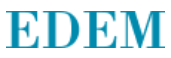






#ANÁLISIS ESTADÍSTICO DE ACCIDENTES CEREBROVASCULARES Y SUS VARIABLES DE ESTILO DE VIDA

Integrantes:



*   Yael Larrosa
*   Gabriela Peñaherrera
*   Inés Soler






# 1.INTRODUCCIÓN Y OBJETIVOS

El análisis del presente conjunto de datos busca encontrar conclusiones acerca de la relación entre ciertos factores de riesgo y la incidencia de accidentes cerebrovasculares (ACV). Además, se pretende explorar cómo los factores demográficos y el estilo de vida pueden influir en la salud cardiovascular. Este estudio tiene el potencial de revelar patrones significativos y proporcionar información valiosa para desarrollar estrategias preventivas dirigidas a diversos segmentos de la población estudiada. Al comprender mejor estas relaciones, se pueden implementar medidas más efectivas para mitigar los riesgos asociados con los ACV y promover un estilo de vida más saludable en general.

El **objetivo principal** de este trabajo es aprender a elaborar un informe detallado y adquirir conocimientos básicos en estadística para extraer conclusiones sobre una población a partir de una muestra representativa. Para alcanzar este objetivo, nos familiarizaremos con diversas herramientas estadísticas, tanto descriptivas como inferenciales.


En nuestro caso, nuestro **objetivo general** de este informe es investigar en qué medida diversas condiciones pueden influir en la probabilidad de que las personas sufran accidentes cerebrovasculares.

Dentro de nuestros **objetivos específicos** podemos encontrar la relación que existe entre el hábito de fumar, la edad, la hipertensión o índices de masa corporal con los accidentes cerebrovasculares.











# 2.DATOS Y METODOLOGIA

## 2.1 ORIGEN DE LOS DATOS

Los datos que emplearemos proceden de un conjunto de datos que proporciona información sobre una muestra específica de individuos. Este conjunto incluye características médicas como la presencia de hipertensión, problemas cardíacos, accidentes cerebrovasculares, niveles de glucosa e índice de masa corporal (IMC). Además, contiene datos personales como la edad, el género y el hábito de fumar. Por lo tanto, estos datos servirán como base para llevar a cabo el estudio.

In [ ]:
# @title Importación de librerias y paquetes
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
import scipy.stats as stats
import math
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# @title Importación del conjunto de datos
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2.2 METODOLOGÍAS UTILIZADAS

Para el análisis estadístico del dataset, utilizaremos distintas metodologías de comprobación para entender la relación entre las variables. Sin embargo, antes de realizar el análisis es importante limpiar el dataset y estructurarlo conforme a nuestras necesidades. Con esto:
1. Empezaremos con un análisis descriptivo lo que nos ayudará a detallar las características principales de un conjunto de datos de manera concisa y comprensible, incluyendo las medidas de tendencia central.
3. También, hemos realizado la comprobación de la normalidad de las variables para validar si nuestros datos siguen una distribución normal.
4. Adicionalmente, es importante hacer la estimación puntual y por intervalos de los parámetros poblacionales ya que estas técnicas nos ayudan a obtener información de la población a partir de una muestra de datos.
5. Con los objetivos planteados queremos comprobar nuestras hipótesis, para lo cual revisaremos si tenemos suficiente relevancia estadística para aceptar o rechazar una hipótesis con relación a los parámetros poblacionales.
6. Finalmente, realizaremos un análisis ANOVA para comprobar la variabilidad de los datos, así como prueba Bartlett y Levene para comprobar la homogeneidad de las varianzas entre los grupos y prueba de Tukey comparar todas las medias de un conjunto de grupos.

# 3.DATA CLEANING

En primer lugar hemos realizado un cambio en el tipo de datos en algunas variables, modificándolas de números enteros a objetos, para facilitar su uso en su trato posterior.

In [ ]:
# @title Tipología de las variables
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# @title Cambio de tipologías
df['hypertension'] = df['hypertension'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')
df['stroke'] = df['stroke'].astype('object')

Analizando los nulos presentes en nuestro dataset hemos visto que son unas pocas observaciones de la variable IMC. Como creemos que esta variable será relevante para los siguientes análisis y la cantidad de observaciones nulas no es significativa ni muestra un patrón hemos decidido eliminar dichas observaciones.
De esta forma, el conjunto de datos resultante contiene 4909 observaciones y 12 columnas.

In [ ]:
# @title Eliminación de observaciones nulas
df_sin_nulos = df.dropna(subset=['bmi'])

# 4.ANÁLISIS DESCRIPTIVO

Para empezar, hemos realizado un "describe" para conocer la información del dataset. Lo que nos indica tener información de alrededor 4909 personas que tienen una edad media de 42.8 años, con un nivel medio de glucosa en sangre de 105,3 mg/dL y su índice de masa corporal medio es de 28,9 kg/m^2.

Adicionalmente, podemos ver la desviación estándar, que nos da una idea de cuan dispersos están los datos de sus medias, y la distribución de nuestros datos entre los percentiles.

In [ ]:
# @title Descripción del conjunto de datos limpio
df_sin_nulos.describe()

,id,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,105.305150,28.893237
std,20995.098457,22.555115,44.424341,7.854067
min,77.000000,0.080000,55.120000,10.300000
25%,18605.000000,25.000000,77.070000,23.500000
50%,37608.000000,44.000000,91.680000,28.100000
75%,55220.000000,60.000000,113.570000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


Para mayor información, en esta tabla cruzada queremos conocer la cantidad de personas según su condición de fumador.

In [ ]:
# @title Tabla cruzada
data = pd.crosstab(index= df_sin_nulos['smoking_status'], columns = 'count')
data

col_0,count
smoking_status,
Unknown,1483
formerly smoked,837
never smoked,1852
smokes,737


Una vez obtenido los datos de la tabla cruzada, lo queremos visualizar mediante el siguiente gráfico que nos indica que existe un 38% que no han fumado, seguido de un 30% que se desconoce, un 17% de personas que anteriormente fumaban y un 15% de las personas que fuman actualmente.


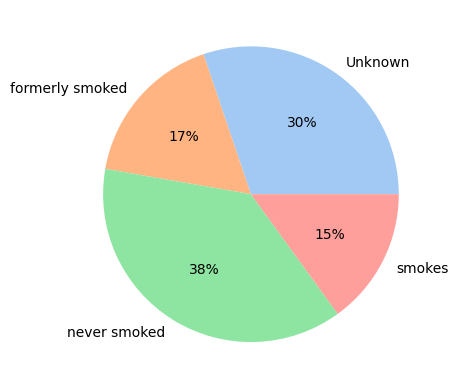

In [ ]:
# @title Visualización de la variable 'smoking_status'
colors = sns.color_palette('pastel')[0:4]

#create pie chart
plt.pie(data['count'], colors = colors, labels = data.index, autopct='%.0f%%')
plt.show()

Una vez revisado la información anterior, queremos conocer el número de personas de acuerdo al género y su condición de fumador. Obteniendo, de esta manera un gráfico de barras para mayor comprensión.

In [ ]:
# @title Tabla cruzada de 'smoking_status' por género
smokes_gender = pd.crosstab(index = df_sin_nulos['smoking_status'], columns = df_sin_nulos['gender'], margins=True)
smokes_gender

gender,Female,Male,Other,All
smoking_status,,,,
Unknown,811,672,0,1483
formerly smoked,458,378,1,837
never smoked,1203,649,0,1852
smokes,425,312,0,737
All,2897,2011,1,4909


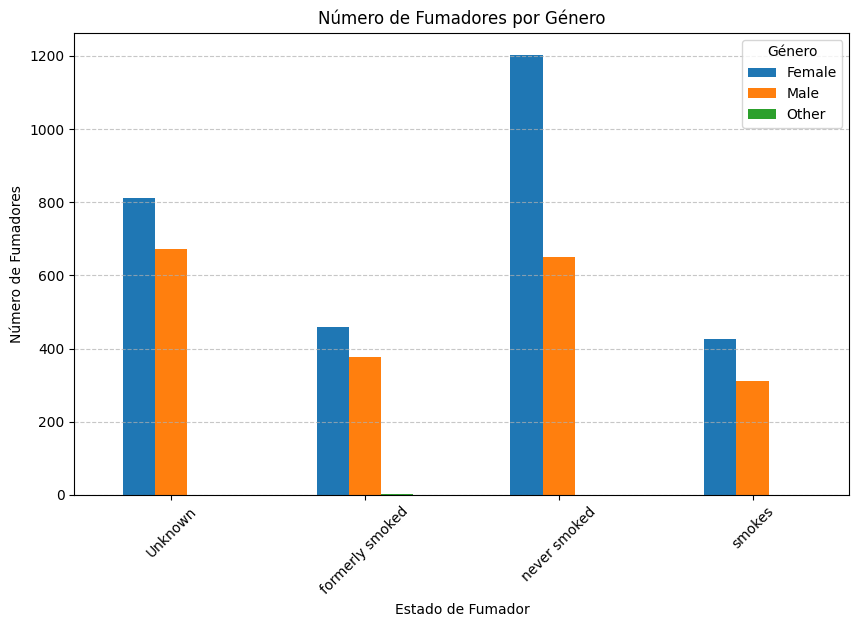

In [ ]:
# @title Gráfico de barras de los fumadores por género
# Calculamos la tabla cruzada sin los totales
smokes_gender = pd.crosstab(index=df_sin_nulos['smoking_status'], columns=df_sin_nulos['gender'])

# Graficamos el gráfico de barras
smokes_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Número de Fumadores por Género')
plt.xlabel('Estado de Fumador')
plt.ylabel('Número de Fumadores')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor legibilidad
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadimos una cuadrícula en el eje y
plt.show()



Con toda esta información podemos observar que nuestra muestra presenta sobretodo datos de  personas que no fuman y de personas que no se sabe si fuman o no. Esta falta de información puede estar debida a que las personas tienen cierto temor o vergüenza a poner en los cuestionarios que son fumadores porque saben que en el ambito de la salud no es algo que esté bien visto.

Otra de nuestras variables es la edad, una variable cuantitativa para la que hemos decidido realizar un gráfico de densidad para poder revisar la forma y la distribución de nuestro conjunto de datos.

Esta forma nos indica que las edades de nuestra población están distribuidas de forma asimétrica con la mayoría de las personas en los grupos de edad más joven.

Text(0, 0.5, 'Densidad')

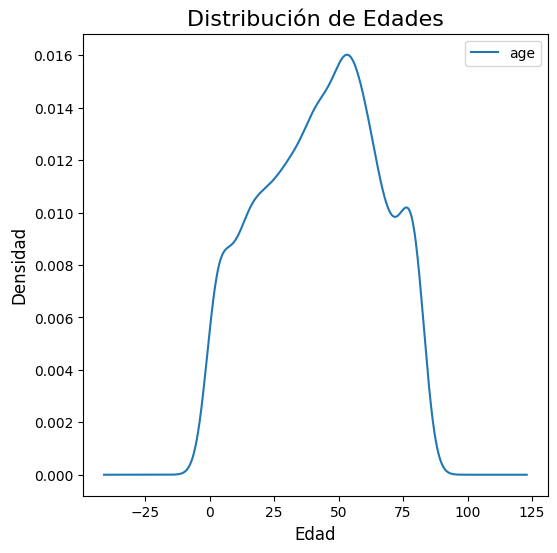

In [ ]:
# @title Gráfico de densidad de la edad
density_plot = pd.DataFrame(df_sin_nulos['age']).plot(kind="density", figsize=(6,6))

density_plot.set_title('Distribución de Edades', fontsize=16)  # Título del gráfico
density_plot.set_xlabel('Edad', fontsize=12)  # Etiqueta del eje x
density_plot.set_ylabel('Densidad', fontsize=12)

En el gráfico de densidad mostrado podemos ver que las edades se distribuyen de una forma que se aleja un poco de la normal. A continuación vamos a evaluar subgrupos apra entender mejor nuestra muestra, con el fin de entender más la población

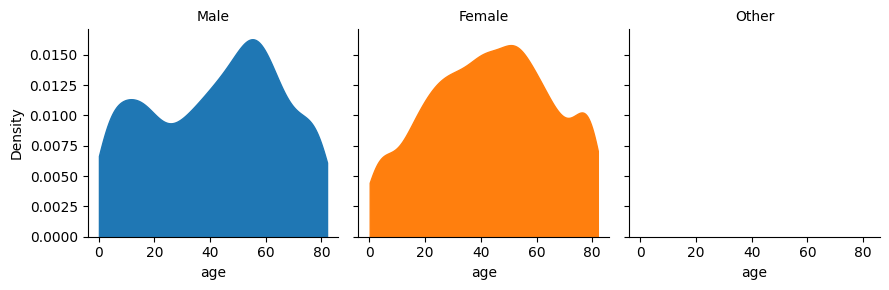

In [ ]:
# @title Gráfico de densidad de la edad por género
g = sns.FacetGrid(df_sin_nulos, col='gender', hue='gender', col_wrap=3)

g.map(sns.kdeplot,"age", cut=0, fill=True, common_norm=False, alpha=1, legend=False)
g.set_titles("{col_name}")

plt.show()

Si separamos este gráfico de densidad entre géneros, vemos que hay algunas diferencias en la distribución entre hombres y mujeres. Las observaciones de hombres entre 20 y 30 años son menos que para el resto de edades, mientras que las observaciones de mujeres empiezan a aumentar de los 20 a los 50 años.

A continuación mostraremos otros gráficos para analizar la parte descriptiva. Primero, hemos utilizado variables categóricas como ataques cardíacos e hipertensión. A raíz de los gráficos de barras resultantes podríamos decir que la mayoría de personas no sufren estas enfermedades, lo cual es lógico y fiel a la realidad por lo que podemos empezar a ver que si que es fiel a la población.

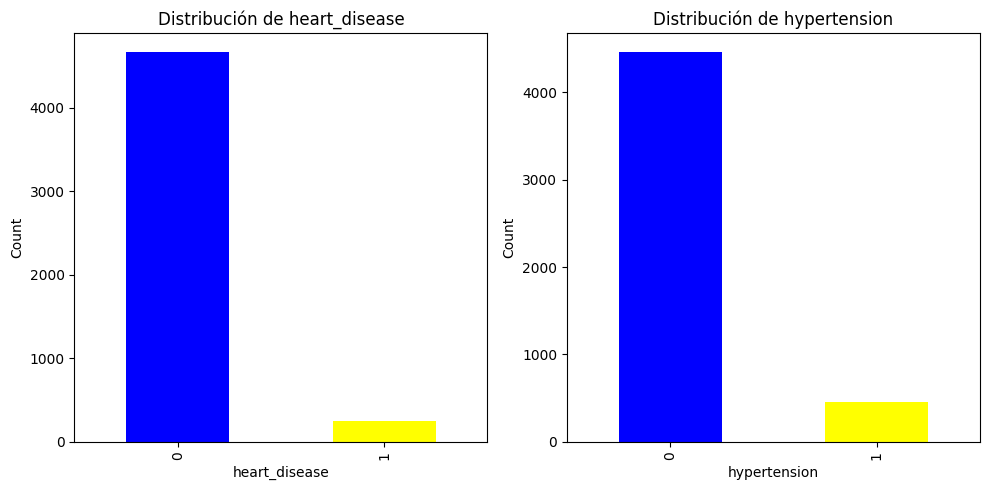

In [ ]:
# @title Distribución de las variables 'heart_disease' e 'hypertension'
# Contar los valores de heart_disease
heart_disease_counts = df_sin_nulos['heart_disease'].value_counts()

# Contar los valores de hypertension
hypertension_counts = df_sin_nulos['hypertension'].value_counts()

# Definir los colores para las barras
colors_heart_disease = ['blue', 'yellow']
colors_hypertension = ['blue', 'yellow']

# Crear los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Gráfico de barras para heart_disease
heart_disease_counts.plot(kind='bar', color=colors_heart_disease, ax=axes[0])
axes[0].set_xlabel('heart_disease')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribución de heart_disease')

# Gráfico de barras para hypertension
hypertension_counts.plot(kind='bar', color=colors_hypertension, ax=axes[1])
axes[1].set_xlabel('hypertension')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribución de hypertension')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Para un mejor análisis, hemos decidido realizar la división del dataframe entre personas que han sufrido un accidente cerebrovascular y los que no lo han sufrido.

In [ ]:
# @title Subset de las personas que **han sufrido** un ictus:
stroke = df_sin_nulos[df_sin_nulos['stroke'] == 1]
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Para aquellos que **han sufrido** un accidente cerebrovascular vemos que la muestra es de 209 personas, con una edad promedio de 67.7 años, con glucosa en sangre promedio de 134.5 mg/dL y su índice de masa corporal promedio de 30.4 kg/m^2.

In [ ]:
# @title Descripción del subset con AVC
stroke.describe()

,id,age,avg_glucose_level,bmi
count,209.000000,209.000000,209.000000,209.000000
mean,37546.038278,67.712919,134.571388,30.471292
std,22078.273383,12.402848,62.462047,6.329452
min,210.000000,14.000000,56.110000,16.900000
25%,17308.000000,58.000000,80.430000,26.400000
50%,36857.000000,70.000000,106.580000,29.700000
75%,56939.000000,78.000000,196.920000,33.700000
max,72918.000000,82.000000,271.740000,56.600000


In [ ]:
# @title Subset de las personas que **no han sufrido** un ictus:
nostroke = df_sin_nulos[df_sin_nulos['stroke'] == 0]
nostroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


Y para aquellos que **no han sufrido** un accidente cerebrovascular, la muestra es de 4700 personas, con una edad promedio de 41.76 años, con glucosa en sangre promedio de 104 mg/dL y su índice de masa corporal promedio de 28.82 kg/m^2.

In [ ]:
# @title Descripción del subset sin AVC
nostroke.describe()

,id,age,avg_glucose_level,bmi
count,4700.000000,4700.000000,4700.000000,4700.000000
mean,37042.892128,41.760451,104.003736,28.823064
std,20947.839253,22.268129,42.997798,7.908287
min,77.000000,0.080000,55.120000,10.300000
25%,18631.000000,24.000000,76.887500,23.400000
50%,37630.000000,43.000000,91.210000,28.000000
75%,54988.000000,59.000000,112.432500,33.100000
max,72940.000000,82.000000,267.760000,97.600000


Por tanto, podemos observar que hay diferencias observables en la edad media, el nivel de glucosa en sangre y el índice de masa corporal entre las personas que han sufrido un ACV y las que no, siendo mayores los promedios de los que lo han sufrido. Esto muestra que se podría decir que es más probable que sufran ataques cerebrovasculares aquellas personas que presentan las condiciones vistas en el párrafo anterior.
En los gráficos siguientes se pueden observar más claramente estas diferencias entre grupos, a pesar de que son similares entre hombres y mujeres dentro del mismo grupo.

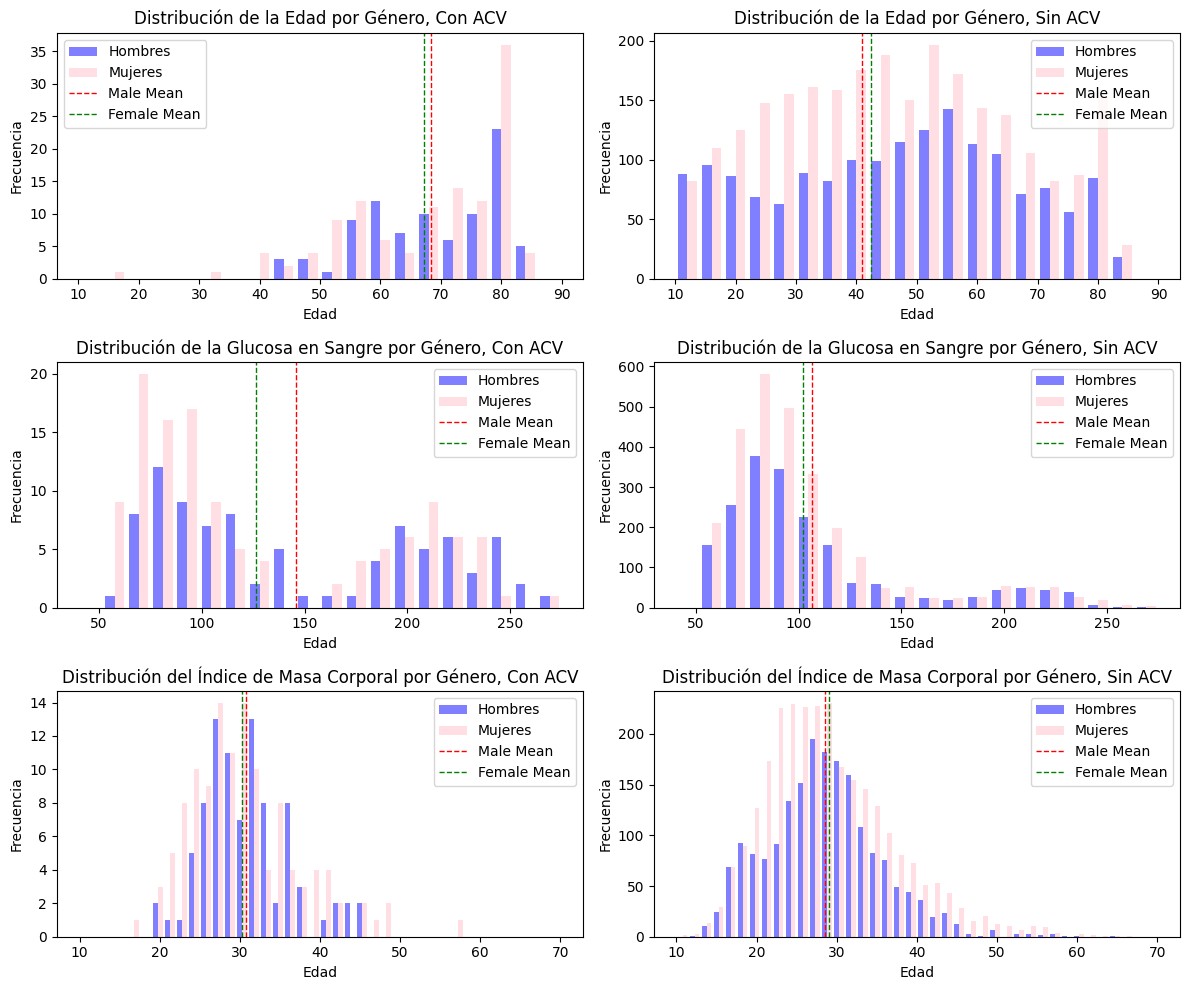

In [ ]:
# @title Histogramas de los grupos con AVC y sin AVC por género según las variables 'edad', 'avg_glucose_level' y 'bmi

### EDAD

#Definir los datos para cada género con ACV
female_age_acv = stroke[stroke['gender'] == 'Female']['age']
male_age_acv = stroke[stroke['gender'] == 'Male']['age']

# Calcular la media de edad para cada género con ACV
female_mean_acv = np.mean(female_age_acv)
male_mean_acv = np.mean(male_age_acv)

# Definir los datos para cada género sin ACV
female_age_noacv = nostroke[nostroke['gender'] == 'Female']['age']
male_age_noacv = nostroke[nostroke['gender'] == 'Male']['age']

# Calcular la media de edad para cada género sin ACV
female_mean_noacv = np.mean(female_age_noacv)
male_mean_noacv = np.mean(male_age_noacv)

# Crear los subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Histograma para género masculino y femenino con ACV
axes[0, 0].hist([male_age_acv, female_age_acv], range=(10, 90), bins=20, color=['blue', 'pink'], alpha=0.5, label=['Hombres', 'Mujeres'])
axes[0, 0].axvline(x=male_mean_acv, color='red', linestyle='dashed', linewidth=1, label='Male Mean')
axes[0, 0].axvline(x=female_mean_acv, color='green', linestyle='dashed', linewidth=1, label='Female Mean')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de la Edad por Género, Con ACV')
axes[0, 0].legend()

# Histograma para género masculino y femenino sin ACV
axes[0, 1].hist([male_age_noacv, female_age_noacv], range=(10, 90), bins=20, color=['blue', 'pink'], alpha=0.5, label=['Hombres', 'Mujeres'])
axes[0, 1].axvline(x=male_mean_noacv, color='red', linestyle='dashed', linewidth=1, label='Male Mean')
axes[0, 1].axvline(x=female_mean_noacv, color='green', linestyle='dashed', linewidth=1, label='Female Mean')
axes[0, 1].set_xlabel('Edad')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de la Edad por Género, Sin ACV')
axes[0, 1].legend()



## NIVEL DE GLUCOSA EN SANGRE

#Definir los datos del avg_glucose_level para cada género con AVC
female_gluc_acv = stroke[stroke['gender'] == 'Female']['avg_glucose_level']
male_gluc_acv = stroke[stroke['gender'] == 'Male']['avg_glucose_level']

# Calcular la media de avg_glucose_level para cada género con ACV
female_gluc_mean_acv = np.mean(female_gluc_acv)
male_gluc_mean_acv = np.mean(male_gluc_acv)

# Definir los datos del avg_glucose_level para cada género sin ACV
female_gluc_noacv = nostroke[nostroke['gender'] == 'Female']['avg_glucose_level']
male_gluc_noacv = nostroke[nostroke['gender'] == 'Male']['avg_glucose_level']

# Calcular la media de edad para cada género sin ACV
female_gluc_mean_noacv = np.mean(female_gluc_noacv)
male_gluc_mean_noacv = np.mean(male_gluc_noacv)


# Histograma para género masculino y femenino con ACV
axes[1, 0].hist([male_gluc_acv, female_gluc_acv], range=(40, 275), bins=20, color=['blue', 'pink'], alpha=0.5, label=['Hombres', 'Mujeres'])
axes[1, 0].axvline(x=male_gluc_mean_acv, color='red', linestyle='dashed', linewidth=1, label='Male Mean')
axes[1, 0].axvline(x=female_gluc_mean_acv, color='green', linestyle='dashed', linewidth=1, label='Female Mean')
axes[1, 0].set_xlabel('Edad')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de la Glucosa en Sangre por Género, Con ACV')
axes[1, 0].legend()

# Histograma para género masculino y femenino sin ACV
axes[1, 1].hist([male_gluc_noacv, female_gluc_noacv], range=(40, 275), bins=20, color=['blue', 'pink'], alpha=0.5, label=['Hombres', 'Mujeres'])
axes[1, 1].axvline(x=male_gluc_mean_noacv, color='red', linestyle='dashed', linewidth=1, label='Male Mean')
axes[1, 1].axvline(x=female_gluc_mean_noacv, color='green', linestyle='dashed', linewidth=1, label='Female Mean')
axes[1, 1].set_xlabel('Edad')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de la Glucosa en Sangre por Género, Sin ACV')
axes[1, 1].legend()


# INDICE DE MASA CORPORAL
#Definir los datos del avg_glucose_level para cada género con AVC
female_imc_acv = stroke[stroke['gender'] == 'Female']['bmi']
male_imc_acv = stroke[stroke['gender'] == 'Male']['bmi']

# Calcular la media de avg_glucose_level para cada género con ACV
female_imc_mean_acv = np.mean(female_imc_acv)
male_imc_mean_acv = np.mean(male_imc_acv)

# Definir los datos del avg_glucose_level para cada género sin ACV
female_imc_noacv = nostroke[nostroke['gender'] == 'Female']['bmi']
male_imc_noacv = nostroke[nostroke['gender'] == 'Male']['bmi']

# Calcular la media de edad para cada género sin ACV
female_imc_mean_noacv = np.mean(female_imc_noacv)
male_imc_mean_noacv = np.mean(male_imc_noacv)


# Histograma para género masculino y femenino con ACV
axes[2, 0].hist([male_imc_acv, female_imc_acv], range=(10, 70), bins=40, color=['blue', 'pink'], alpha=0.5, label=['Hombres', 'Mujeres'])
axes[2, 0].axvline(x=male_imc_mean_acv, color='red', linestyle='dashed', linewidth=1, label='Male Mean')
axes[2, 0].axvline(x=female_imc_mean_acv, color='green', linestyle='dashed', linewidth=1, label='Female Mean')
axes[2, 0].set_xlabel('Edad')
axes[2, 0].set_ylabel('Frecuencia')
axes[2, 0].set_title('Distribución del Índice de Masa Corporal por Género, Con ACV')
axes[2, 0].legend()

# Histograma para género masculino y femenino sin ACV
axes[2, 1].hist([male_imc_noacv, female_imc_noacv], range=(10, 70), bins=40, color=['blue', 'pink'], alpha=0.5, label=['Hombres', 'Mujeres'])
axes[2, 1].axvline(x=male_imc_mean_noacv, color='red', linestyle='dashed', linewidth=1, label='Male Mean')
axes[2, 1].axvline(x=female_imc_mean_noacv, color='green', linestyle='dashed', linewidth=1, label='Female Mean')
axes[2, 1].set_xlabel('Edad')
axes[2, 1].set_ylabel('Frecuencia')
axes[2, 1].set_title('Distribución del Índice de Masa Corporal por Género, Sin ACV')
axes[2, 1].legend()


# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Por otra parte, es importante graficar las variables continuas para ver si los datos están distribuidos idénticamente desde el centro de la muestra y conocer la correlación entre las variables.

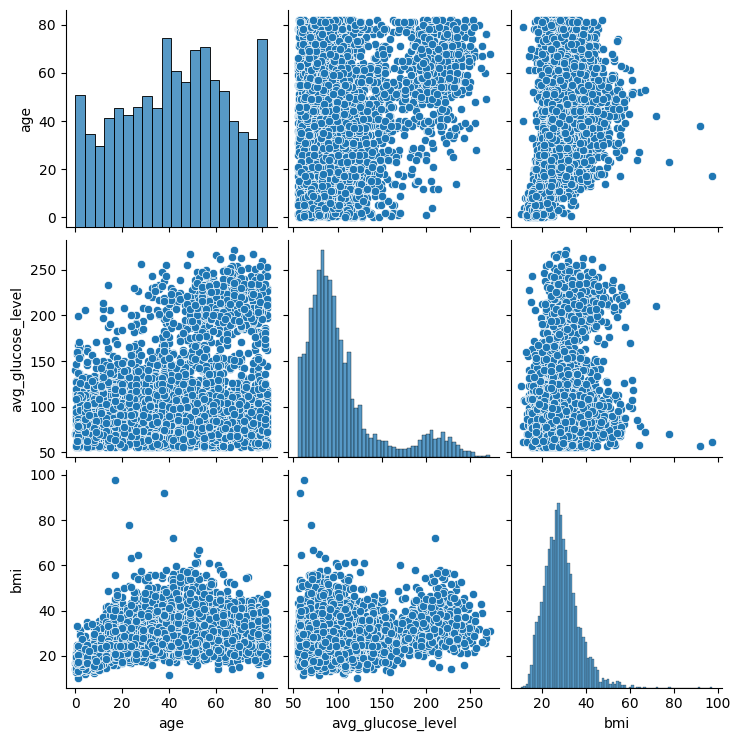

In [ ]:
# @title Histogramas y gráficos de correlación
df_graf = df_sin_nulos[['age', 'avg_glucose_level', 'bmi']]
sns.pairplot(df_graf, kind='scatter')
plt.show()

Si nos centramos en los histogramas, podemos ver que, a priori, la distribución de la variable 'bmi' es la única que se acerca a una distribución normal y en cuanto a la correlación entre las variables, se puede ver más claramente en la siguiente matriz de correlación. La forma de interpretar los resultados es:
- Cuanto más cerca de -1, más fuerte será la relación lineal negativa entre ambas variables.
- Cuanto más cerca del 1, más fuerte será la relación lineal positiva entre las variables.
- Cuanto más cerca de cero, menos probable que exista una relación lineal entre ambas variables.

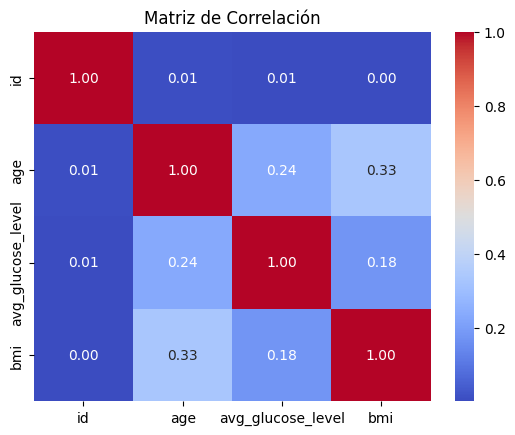

In [ ]:
# @title Matriz de correlación
correlation_matrix = df_sin_nulos.corr()

# Visualizar la matriz de correlación usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

De la esta matriz podemos concluir que la relación entre todas nuestras variables es positiva, es decir, cuando una aumenta las otras también aumentan, pero a su vez todos los coeficientes son bastante cercanos a 0 (entre 0.18 y 0.33) y por tanto, la relación lineal entre ellas es muy débil.

Para finalizar con el análisis descriptivo relizaremos algunos diagramas de Box-Whisker. Este diagrama es un gráfico que representa la forma de nuestra variable y que consideramos el más apropiado para analizar las 5 medidas de posición de nuestras variables que son: el mínimo, el primer cuartil, la mediana, el tercer cuartil y el máximo.

Para analizarlo es importante saber que la caja del centro muestra el rango entre el primer y el tercer cuartil así como una línea que representa la mediana.
Las líneas que se extienden paralelas a la caja se conocen como «bigotes», y se usan para indicar la variabilidad fuera de los cuartiles superior e inferior y los valores atípicos se representan como puntos individuales en línea con los bigotes.
De esta forma, podemos conocer:
- Cuáles son los valores clave, tales como: la mediana, el percentil 25, etc.
- Si hay valores atípicos y cuáles son sus valores.
- Si los datos son simétricos.
- Cuán estrechamente se agrupan los datos.
- Si los datos están sesgados y si es así, en qué dirección.

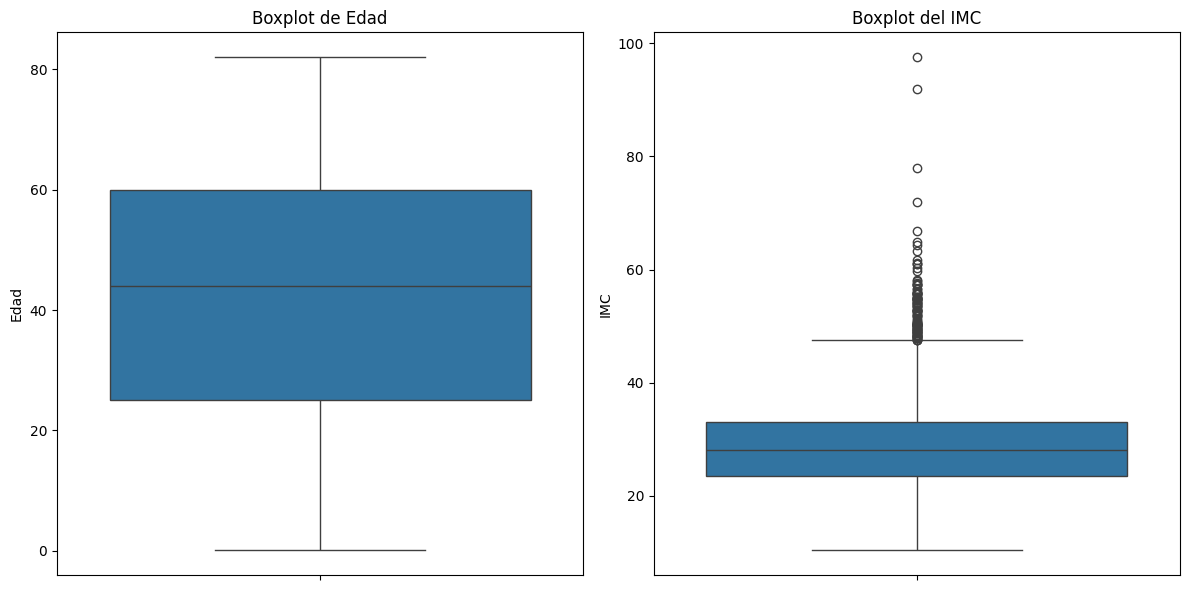

In [ ]:
# @title Diagramas de Box-Whisker para la edad y el IMC
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Trazar boxplot para 'age' en el primer subgráfico
sns.boxplot(y='age', data=df_sin_nulos, ax=axes[0])
axes[0].set_title('Boxplot de Edad')
axes[0].set_ylabel('Edad')

# Trazar boxplot para 'bmi' en el segundo subgráfico
sns.boxplot(y='bmi', data=df_sin_nulos, ax=axes[1])
axes[1].set_title('Boxplot del IMC')
axes[1].set_ylabel('IMC')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Lo primero que salta a la vista en estos diagramas es la cantidad de valores atípicos de la variable IMC. El problema de los valores atípicos se extiende a cuando queremos hacer contrastes de hipótesis, correlaciones y regresiones.
Las pruebas de hipótesis son sensibles al incumplimiento de los supuestos de los modelos y a la presencia de outliers. Cuando los datos no cumplen con estos supuestos disminuye la capacidad de detectar efectos reales(afecta al p-valor, al tamaño del efecto y a los intervalo de confianza estimados).
Más adelante veremos como abordar este problema.

De momento, realizaremos otro par de diagramas para visualizar las mismas variables pero separadas según si han sufrido un ACV o no con el objetivo de ver si podemos identificar grupos en nuestra muestra.


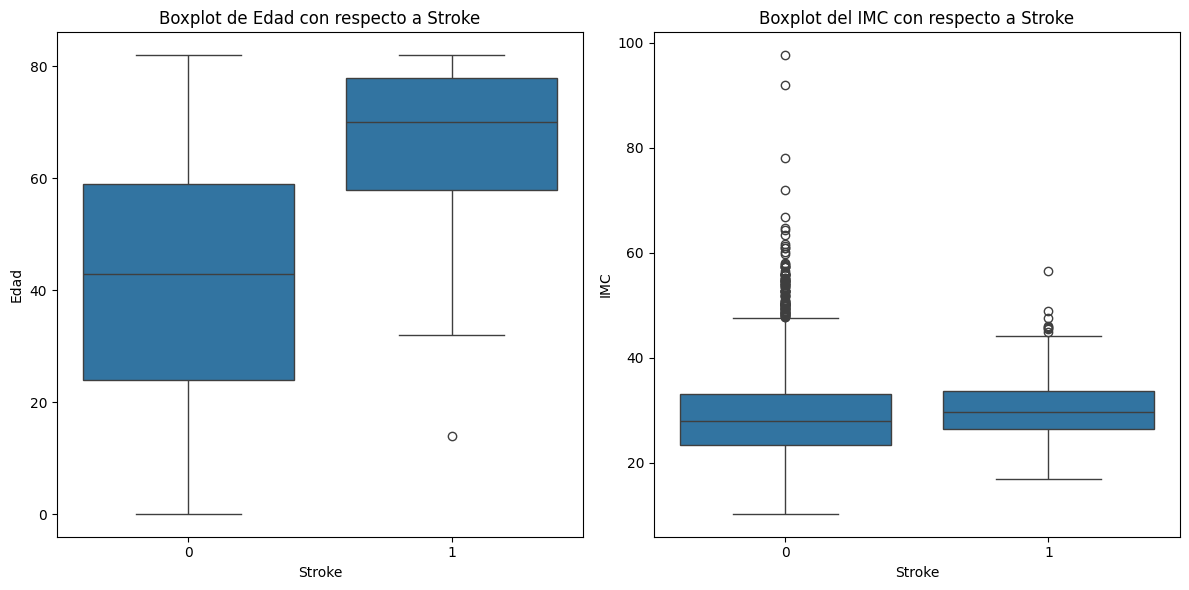

In [ ]:
# @title Diagramas de Box-Whisker para la edad y el IMC por 'stroke'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(x='stroke', y='age', data=df_sin_nulos, ax=axes[0])
axes[0].set_title('Boxplot de Edad con respecto a Stroke')
axes[0].set_xlabel('Stroke')
axes[0].set_ylabel('Edad')

sns.boxplot(x='stroke', y='bmi', data=df_sin_nulos, ax=axes[1])
axes[1].set_title('Boxplot del IMC con respecto a Stroke')
axes[1].set_xlabel('Stroke')
axes[1].set_ylabel('IMC')

plt.tight_layout()
plt.show()



Por una parte vemos que para las medidas de posición de la edad sí que es relevante si las personas han sufrido un ACV o no siendo la mediana y el mínimo de edad mucho mayor para los que lo han sufrido. Pero por otra parte, las medidas de posición del IMC como la media, el máximo y el 3r cuartil son bastante similares para las personas que han tenido con ACV como para las que no.

# 5.INFERENCIA ESTADÍSTICA

Para la realizacion de la inferencia estadística seleccionamos como la variable de estudio el índice de masa corporal (bmi). Además de ser la que visualmente más se acerca a una distribución normal también nos interesa conocer como varía este índice según distintas condiciones que iremos evaluando.

## 5.1 COMPROBACIÓN DE NORMALIDAD

Además del análisis descriptivo inicial para visualizar la normalidad de nuestras variables de estudio, también emplearemos una variedad de pruebas diseñadas para verificar si las variables de estudio siguen una distribución normal. En concreto haremos las pruebas para la variable bmi, que es con la que seguiremos avanzando en este estudio.


Todos los test de normalidad que vamos a realizar parten de las siguientes hipótesis:

**H0: Los datos provienen de una distribución normal.**

**H1: Los datos no provienen de una distribución normal.**


El objetivo de estos tests es evaluar si existe suficiente evidencia para rechazar la hipótesis nula en favor de la alternativa, es decir, si los datos no siguen una distribución normal. Si el p-valor resultante del test es menor que un nivel de significancia predefinido (utilizaremos 0.05), entonces se rechaza la hipótesis nula, lo que sugiere que los datos no siguen una distribución normal.








In [ ]:
# @title Tests para evaluar la normalidad
bmi_normal = stats.normaltest(df_sin_nulos['bmi'], nan_policy = 'omit')
print('Resultado del test de Normalidad para el IMC de las personas con ACV:')
print(f'Statistic: {bmi_normal.statistic:.4f}, p-value: {bmi_normal.pvalue:.7f}')

shapirobmi = shapiro(df_sin_nulos['bmi'])
print('Resultado del test de Shapiro para el IMC (de todos)')
print(f'Statistic: {shapirobmi.statistic:.4f}, p-value: {shapirobmi.pvalue:.7f}')

bmi_log = np.log10(df_sin_nulos['bmi'])
logbmi = shapiro(bmi_log)
print('Resultado del test de Shapiro para el IMC transformado logarítmicamente')
print(f'Statistic: {logbmi.statistic:.4f}, p-value: {logbmi.pvalue:.7f}')

NormaltestResult(statistic=1021.1795052962864, pvalue=1.793444363882936e-222)

En todos los tests anteriores realizados, observamos que el valor p es menor que 0.05. Esto implica que existe evidencia suficiente para rechazar la hipótesis nula en todos los casos. Por lo tanto, se concluye que los datos de nuestra población no siguen una distribución normal, según los resultados de los tests realizados.

Esto puede deberse a diferentes causas. Puede ser por sesgos en los datos o en nuestro caso, muy probablemente, por la gran presencia de outliers.


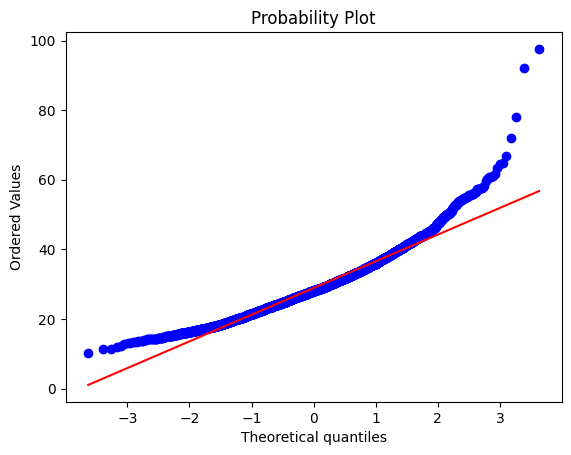

In [ ]:
# @title Gráfico Q-Q para evaluar en que medida la variable bmi se ajusta a una normal
stats.probplot(df_sin_nulos['bmi'], dist="norm", plot=plt)
plt.show()

En el gráfico Q-Q, comparamos la distribución teórica de la normal con nuestra muestra para evaluar su ajuste a dicha distribución. Durante nuestro análisis, hemos notado que los valores atípicos son aquellos que se alejan de la distribución normal teórica, mientras que la mayoría de los datos se alinean con esta distribución. Este gráfico nos proporciona una comprensión más clara de por qué los tests de normalidad realizados previamente podrían no haber concluido que nuestros datos siguen una distribución normal, a pesar de que la gran mayoría de ellos sí lo hacen.









A pesar de que, según los tests de normalidad, la variable 'bmi' no sigue una distribución normal, el dataset tiene observaciones suficientes para asegurar que la media sigue una distribución normal, según el teorema del límite central.

In [ ]:
# @title Evaluación de normalidad por enfermos/sanos

shapiroacv = shapiro(stroke['bmi'])
print('Resultado del test de Shapiro para el IMC de las personas con ACV:')
print(f'Statistic: {shapiroacv.statistic:.4f}, p-value: {shapiroacv.pvalue:.7f}')

normalacv = stats.normaltest(stroke['bmi'], nan_policy = 'omit')
print('\nResultado del test de normalidad para el IMC de las personas con ACV: ')
print(f'Statistic: {normalacv.statistic:.4f}, p-value: {normalacv.pvalue:.7f}')

shapironoacv = shapiro(nostroke['bmi'])
print('\nResultado del test de Shapiro para el IMC de las personas sin ACV: ')
print(f'Statistic: {shapironoacv.statistic:.4f}, p-value: {shapironoacv.pvalue:.7f}')

normalnoacv = stats.normaltest(nostroke['bmi'], nan_policy = 'omit')
print('\nResultado del test de normalidad para el IMC de las personas sin ACV: ')
print(f'Statistic: {normalnoacv.statistic:.4f}, p-value: {normalnoacv.pvalue:.7f}')

Resultado del test de Shapiro para el IMC de las personas con ACV:
Statistic: 0.9564, p-value: 0.0000052

Resultado del test de normalidad para el IMC de las personas con ACV: 
Statistic: 29.5266, p-value: 0.0000004

Resultado del test de Shapiro para el IMC de las personas sin ACV: 
Statistic: 0.9524, p-value: 0.0000000

Resultado del test de normalidad para el IMC de las personas sin ACV: 
Statistic: 993.8157, p-value: 0.0000000


## 5.1.ESTIMACIÓN PUNTUAL

Las estimaciones puntuales son estimaciones de parámetros de población basadas en datos de muestra.

In [ ]:
# @title Edad promedio de un hombre con accidente cerebrovascular
stroke_male = stroke[stroke['gender'] == "Male"]
mean_stroke_male = stroke_male['age'].mean()
print(f'{mean_stroke_male:.2f} años')



68.35 años


In [ ]:
# @title Edad promedio de una mujer con accidente cerebrovascular
stroke_female = stroke[stroke['gender'] == "Female"]
mean_stroke_female = stroke_female['age'].mean()
print(f'{mean_stroke_female:.2f} años')

67.24 años


En este caso, podríamos decir que la media poblacional de la edad para los hombres con ACV se situaría alrededor de los 68.35 años y la de las mujeres alrededor de los 67.24 años.

Adicionalmente, haremos una estimación puntual para el índice de masa corporal pero en este caso separando a aquellas personas que han sufrido un ACV de las que no.

In [ ]:
# @title Estimación del IMC
print('Media del IMC de aquellas personas sin ACV:')
media_noacv = nostroke['bmi'].mean()
print(f'{media_noacv:.2f}')

print('\nMedia del IMC de aquellas personas con ACV:')
media_acv = stroke['bmi'].mean()
print(f'{media_acv:.2f}')

Media del IMC de aquellas personas sin ACV:
28.82

Media del IMC de aquellas personas con ACV:
30.47


Y como se puede ver, parecee que sí hay diferencia entre la media de ambos grupos. La media poblacional del IMC de las personas que han sufrido un ictus se situaría alrededor de 30.47, mientras que la de las personas que no lo han sufrido sería de 28.82 aproximadamente.

## 5.2.ESTIMACIÓN POR INTERVALOS

Un intervalo de confianza es un rango de valores por encima y por debajo de una estimación puntual que captura el verdadero parámetro de la población en algún nivel de confianza predeterminado, en nuestro caso, el 95%.

In [ ]:
# @title Intervalo de confianza para la media del IMC de toda la muestra
sigma = df_sin_nulos['bmi'].std()/math.sqrt(len(df_sin_nulos))
stats.t.interval(confidence = 0.95,
                 df = len(df_sin_nulos),
                 loc = df_sin_nulos['bmi'].mean(),
                 scale= sigma)

(28.6734745801079, 29.112999243481426)

Según estos resultados, podemos decir que el 95% de la población tiene un IMC de entre 28.67 y 29.11.

De todas formas, a continuación procedemos a calcular dos intervalos de confianza diferentes. Uno para aquellas personas que no han sufrido un ACV y otro para las que sí lo han sufrido.

In [ ]:
# @title Intervalo de confianza para el IMC de las personas sin ACV
sigma = nostroke['bmi'].std()/math.sqrt(len(nostroke))
stats.t.interval(confidence = 0.95,  # Confidence level
                 df = len(nostroke),  # Degrees of freedom
                 loc = nostroke['bmi'].mean(), # Sample mean
                 scale= sigma)

(28.596915469403342, 29.049212190171133)

In [ ]:
# @title Intervalo de confianza para el IMC de las personas con ACV
sigma = stroke['bmi'].std()/math.sqrt(len(stroke))

stats.t.interval(confidence = 0.95,              # Confidence level
                 df= len(stroke),                    # Degrees of freedom
                 loc = stroke['bmi'].mean(),         # Sample mean
                 scale = sigma)

(29.608187759510855, 31.33439597254656)

Por tanto, sí podemos hacer una diferenciación y decir que, con un nivel de confianza del 95%, el IMC de la población estaría entre 28.59 y 29.04 si no ha sufrido ningún ACV mientras que para la parte de la población que sí ha sufrido un ACV se situaría entre un 29.60 y un 31.33.

# 6.CONTRASTES DE HIPÓTESIS

Las estimaciones puntuales y los intervalos de confianza son herramientas de inferencia básicas que actúan como base para el contraste de hipótesis.

Como ya se ha explicado anteriormente en la sección de la evaluación de la normalidad, el propósito de un contraste de hipótesis es determinar si es probable que la hipótesis nula (H0) sea cierta dados los datos de la muestra.
Si la hipótesis nula es improbable dados los datos, se puede rechazar la hipótesis nula a favor de la hipótesis alternativa, según un grado de confianza del 95% en este caso.

In [ ]:
# @title Hipótesis nula (H0): el número de personas que fuman y que nunca han fumado es el mismo
# Calcular la media de cada subgrupo
media_subgrupo1 = np.mean(df_sin_nulos['smoking_status']=='smokes')
media_subgrupo2 = np.mean(df_sin_nulos['smoking_status']=='never smoked')

# Realizar el test de hipótesis de estimación puntual
resultado = stats.ttest_ind(df_sin_nulos['smoking_status']=='smokes', df_sin_nulos['smoking_status']=='never smoked')

# Imprimir los resultados
print("Media del subgrupo 1:", media_subgrupo1)
print("Media del subgrupo 2:", media_subgrupo2)
print("Resultado del test de hipótesis:", resultado)

Media del subgrupo 1: 0.15013240985944185
Media del subgrupo 2: 0.37726624567121614
Resultado del test de hipótesis: TtestResult(statistic=-26.427901466483284, pvalue=9.632830312765223e-149, df=9816.0)


Como el p-value es mucho menor que 0.05 podemos rechazar la hipótesis nula y afirmar que, dados los datos de nuestro dataset, hay más personas que nunca han fumado

In [ ]:
# @title Hipótesis nula (H0): la edad media de las personas que fuman es la misma que aquellos que nunca han fumado
# Calcular la media de cada subgrupo
df_edad = df_sin_nulos[df_sin_nulos['smoking_status'] == 'smokes']['age']
df_edad2=df_sin_nulos[df_sin_nulos['smoking_status'] == 'never smoked']['age']

media_subgrupo1 = np.mean(df_edad)
media_subgrupo2 = np.mean(df_edad2)

# Realizar el test de hipótesis de estimación puntual
resultado = stats.ttest_ind(df_edad, df_edad2)

# Imprimir los resultados
print("Media del subgrupo 1:", media_subgrupo1)
print("Media del subgrupo 2:", media_subgrupo2)
print("Resultado del test de hipótesis:", resultado)

Media del subgrupo 1: 46.98643147896879
Media del subgrupo 2: 46.46922246220302
Resultado del test de hipótesis: TtestResult(statistic=0.6317778867599986, pvalue=0.5275878475691567, df=2587.0)


Como el p-value es mayor a 0,05 podemos afirmar que la hipótesis nula es cierta y por tanto, la media de edad de aquellos que fuman y los que nunca han fumado es la misma

In [ ]:
# @title Hipótesis nula (H0): No hay relación entre el hábito de fumar y sufrir un accidente cerebrovascular
# Tabla de contingencia: Fumadores vs. Stroke
contingency_table = pd.crosstab(df_sin_nulos['smoking_status'], df_sin_nulos['stroke'])

# Prueba de Chi-cuadrado para comparar las proporciones de stroke entre fumadores y no fumadores
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Valor de chi-cuadrado:", chi2)
print("Valor p:", p_value)

# Determinar si el valor p es menor que un nivel de significancia dado (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Existe evidencia significativa para afirmar que las personas que fuman tienen más probabilidades de tener un accidente cerebrovascular (stroke).")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para afirmar que las personas que fuman tienen más probabilidades de tener un accidente cerebrovascular (stroke).")


Valor de chi-cuadrado: 34.9434924570628
Valor p: 1.2522021032753853e-07
Se rechaza la hipótesis nula: Existe evidencia significativa para afirmar que las personas que fuman tienen más probabilidades de tener un accidente cerebrovascular (stroke).


Como el p-value es menor que 0.05, se rechaza la hipótesis nula y por tanto, podemos afirmar que sí hay relación entre ell hábito de fumar y sufrir un ACV.

# 7.ANOVA

El análisis de varianza (ANOVA, por sus siglas en inglés) es una técnica estadística utilizada para comparar las medias de tres o más grupos para determinar si al menos uno de los grupos difiere significativamente de los demás en términos de la variable de interés. Se realiza bajo la hipótesis nula de que las medias de todos los grupos son iguales.

En nuestro caso, la prueba ANOVA nos permite comprobar si una variable de respuesta numérica (el IMC) varía según los niveles de otras variables como 'stroke', 'hypertension', 'heart_disease' y 'smoking_status'.

El resultado de un ANOVA proporciona información sobre la significancia estadística de cada variable independiente (predictora) incluida en el modelo en relación con la variable dependiente (respuesta), teniendo en cuenta el efecto de las demás variables independientes en el modelo.

El resultado del ANOVA generalmente incluye varias estadísticas y valores, y la interpretación de estos depende de varios factores, incluidos los siguientes:

- Suma de cuadrados (SS): La suma de cuadrados mide la variabilidad total explicada por cada variable independiente en el modelo. Una suma de cuadrados grande indica que la variable explica una gran cantidad de variabilidad en la variable dependiente.

- Grados de libertad (df): Los grados de libertad representan el número de categorías menos uno de una variable categórica. En el caso de ANOVA, los grados de libertad generalmente se dividen en dos componentes: los grados de libertad del modelo y los grados de libertad del error. Los grados de libertad del modelo son iguales al número de variables independientes menos uno, y los grados de libertad del error son iguales al número total de observaciones menos el número de variables independientes.

- Media de cuadrados (MS): La media de cuadrados es la suma de cuadrados dividida por los grados de libertad. Mide la variabilidad promedio explicada por cada variable independiente.
Estadística F: La estadística F es una medida de la proporción de variabilidad explicada por el modelo en relación con la variabilidad no explicada. Un valor grande de la estadística F indica que el modelo es significativamente mejor que un modelo que no incluye las variables independientes.

- Valor p: El valor p indica la probabilidad de observar los datos si la hipótesis nula es verdadera. En el contexto de ANOVA, un valor p pequeño (< 0.05) indica que al menos una de las variables independientes es significativamente predictora de la variable dependiente.
En resumen, al interpretar el resultado del ANOVA, buscas variables con un valor p pequeño y una estadística F grande, lo que indica que estas variables son significativas para predecir la variable dependiente. Además, puedes examinar las diferencias entre los grupos utilizando pruebas de comparaciones múltiples para identificar específicamente qué grupos difieren entre sí.

In [ ]:
# @title ANOVA de bmi ~ stroke + hypertension + heart_disease + smoking_status

model = ols('bmi ~ stroke + hypertension + heart_disease + smoking_status',
            data = df_sin_nulos).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                       sum_sq      df           F        PR(>F)
stroke               2.787131     1.0    0.049663  8.236593e-01
hypertension      4919.084865     1.0   87.652344  1.159491e-20
heart_disease        6.478727     1.0    0.115443  7.340446e-01
smoking_status   18903.637766     3.0  112.280245  2.582745e-70
Residual        275102.215536  4902.0         NaN           NaN


Según los resultados del ANOVA, vemos que las variables 'stroke' y 'smoking_status' explican una gran cantidad de variabilidad en la variable IMC ya que su suma de cuadrados es bastante grande y como el valor de su estadística F también es bastante grande, y su p-valor bastante más pequeño que 0.05, se podría decir que estas variables son significativas apra predecir el IMC.

## 7.1. COMPROBACIÓN DE CONDICIONES DE APLICABILIDAD

No obstante, para aplicar ANOVA de forma adecuada, es importante tener en cuenta varias condiciones y supuestos que deben cumplirse para obtener resultados válidos y fiables. Estos supuestos incluyen:
1. Poblaciones normalmente distribuidas en cada grupo.
2. Homocedasticidad de varianzas entre grupos.
3. Muestras aleatoria e independientes.

<Axes: xlabel='smoking_status', ylabel='bmi'>

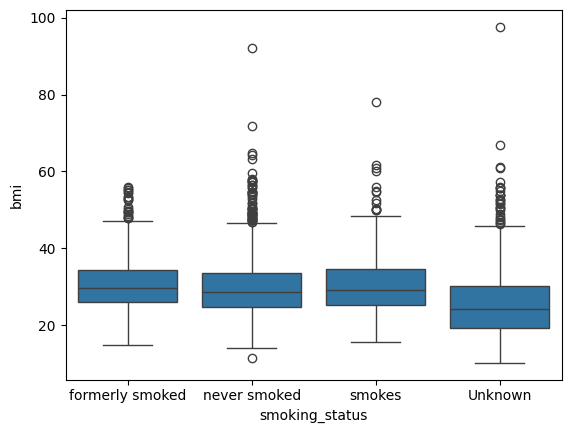

In [ ]:
# @title Box plot por smoking_status
sns.boxplot(y = df_sin_nulos['bmi'],
            x = df_sin_nulos['smoking_status'])

Mediante el gráfico anterior podemos ver que se puede considerar que todos los subgrupos están normalmente distribuidos ya que la distrancia entre bigotes es la misma en cada caso y también podemos ver que la mediana queda bastante centrada en las cajas. Además, añadir que el 50% de los datos se encuentran en rangos bastante estrechos, tal y como se puede ver por el alto de las cajas.
Otro aspecto a considerar es que entre los subgrupos también parece haber una distribución similar, el unico que podríamos consideraar que difiere es el subgrupo 'unknown' pero mediante el análisis veremos si es una diferencia significante como para decir que ese subgrupo difiere del resto.

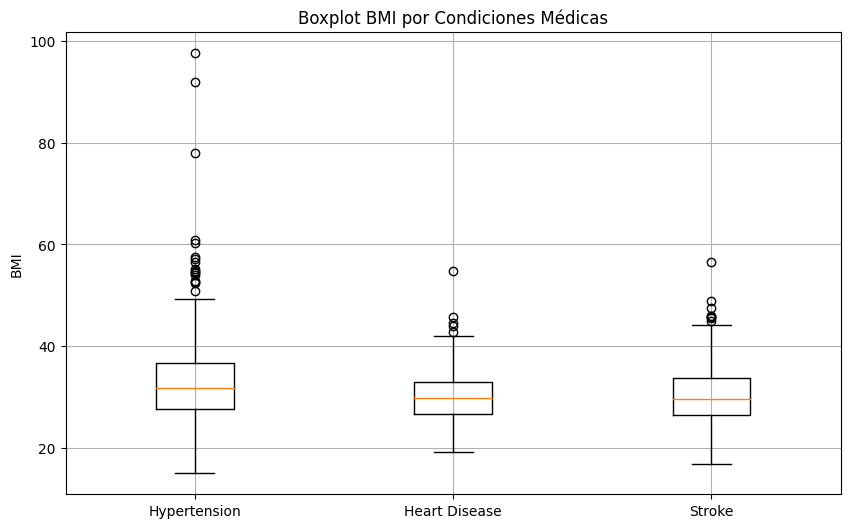

In [ ]:
# @title Homogeneidad de varianzas de personas con problemas médicos
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([
    df_sin_nulos[df_sin_nulos['hypertension'] == 1]['bmi'],
    df_sin_nulos[df_sin_nulos['heart_disease'] == 1]['bmi'],
    df_sin_nulos[df_sin_nulos['stroke'] == 1]['bmi']
], labels=['Hypertension', 'Heart Disease', 'Stroke'])

# Configuración de la gráfica
plt.title('Boxplot BMI por Condiciones Médicas')
plt.ylabel('BMI')

# Mostrar el boxplot
plt.grid(True)
plt.show()

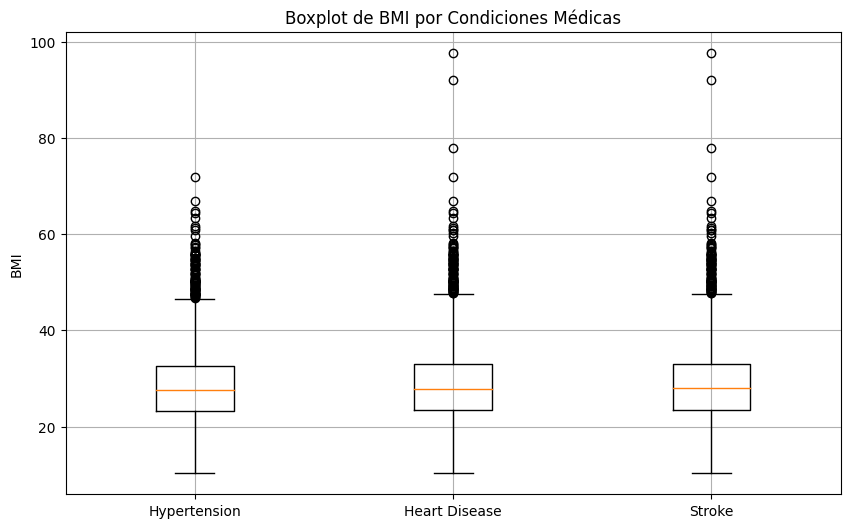

In [ ]:
# @title Homogeneidad de varianzas de personas sin problemas médicos
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([
    df_sin_nulos[df_sin_nulos['hypertension'] == 0]['bmi'],
    df_sin_nulos[df_sin_nulos['heart_disease'] == 0]['bmi'],
    df_sin_nulos[df_sin_nulos['stroke'] == 0]['bmi']
    ], labels=['Hypertension', 'Heart Disease', 'Stroke'])

# Configuración de la gráfica
plt.title('Boxplot de BMI por Condiciones Médicas')
plt.ylabel('BMI')

# Mostrar el boxplot
plt.grid(True)
plt.show()

Hemos separado dos sugbrupos de enfermos y no enfermos y de cada uno hemos analizado como se distribuyen los subgrupos dentro de estos. Hemos visto que la homogeneidad entre varianzas para personas sin problemas médicos se podría considerar que se cumple, pero en aquellas personas con problemas médicos puede considerarse que esa homogeneidad no está presente.

### Pruebas de Barlett


La prueba de Bartlett es un método estadístico utilizado para evaluar la igualdad de matrices de covarianza en diferentes grupos o muestras. Se emplea principalmente en el análisis de varianza (ANOVA) para determinar si las varianzas de varias muestras son homogéneas o no.

In [ ]:
# @title Homogeneidad de varianzas entre subgrupos de smoke

# Lista de grupos únicos de 'smoking_status'
grupos = df_sin_nulos['smoking_status'].unique()

# Lista para almacenar las muestras de cada grupo
muestras_por_grupo = []

# Dividir los datos en subgrupos según 'smoking_status' y almacenarlos en la lista
for grupo in grupos:
    muestras_por_grupo.append(df_sin_nulos[df_sin_nulos['smoking_status'] == grupo]['bmi'])

# Realizar la prueba de Bartlett para comparar las varianzas entre los grupos
statistic, p_value = bartlett(*muestras_por_grupo)
print("\nPrueba de Bartlett:")
print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)
if p_value > 0.05:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. Las varianzas son homogéneas.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas no son homogéneas.")


Prueba de Bartlett:
Estadístico de prueba: 31.507108719392033
Valor p: 6.647269424255652e-07
Se rechaza la hipótesis nula. Las varianzas no son homogéneas.


Mediante el test podemos ver que la prueba considera que hay evidencias suficientes para determinar que las varianzas no son homogenea ya que sale un p-valor inferior a 0,05.

In [ ]:
# @title Homogeneidad de varianzas entre subgrupos de work_type

# Lista de grupos únicos de 'smoking_status'
grupos = df_sin_nulos['work_type'].unique()

# Lista para almacenar las muestras de cada grupo
muestras_por_grupo = []

# Dividir los datos en subgrupos según 'smoking_status' y almacenarlos en la lista
for grupo in grupos:
    muestras_por_grupo.append(df_sin_nulos[df_sin_nulos['work_type'] == grupo]['bmi'])

# Realizar la prueba de Bartlett para comparar las varianzas entre los grupos
statistic, p_value = bartlett(*muestras_por_grupo)
print("\nPrueba de Bartlett:")
print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)
if p_value > 0.05:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. Las varianzas son homogéneas.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas no son homogéneas.")


Prueba de Bartlett:
Estadístico de prueba: 232.25163713919716
Valor p: 4.323648977752474e-49
Se rechaza la hipótesis nula. Las varianzas no son homogéneas.


Vemos que en este caso tamiben hay evidencia suficiente para decir que las varainzas no son homogeneas pero vamos a probar a quitar el grupo never_worked por si al ser un grupo con mucha variabilidad está alterando la prueba.

In [ ]:
# @title Homogeneidad de varianzas entre subgrupos de work_type sin el grupo 'nerver_worked'
# Obtener las categorías únicas de work_type excluyendo "Never_worked"
categories = df_sin_nulos[df_sin_nulos['work_type'] != 'Never_worked']['work_type'].unique()


# Lista para almacenar las muestras de cada grupo
muestras_por_grupo = []

# Dividir los datos en subgrupos según 'smoking_status' y almacenarlos en la lista
for categories in grupos:
    muestras_por_grupo.append(df_sin_nulos[df_sin_nulos['work_type'] == categories]['bmi'])

# Realizar la prueba de Bartlett para comparar las varianzas entre los grupos
statistic, p_value = bartlett(*muestras_por_grupo)
print("\nPrueba de Bartlett:")
print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)
if p_value > 0.05:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. Las varianzas son homogéneas.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas no son homogéneas.")



Prueba de Bartlett:
Estadístico de prueba: 232.25163713919716
Valor p: 4.323648977752474e-49
Se rechaza la hipótesis nula. Las varianzas no son homogéneas.


Podemos ver que aun quitando los que nunca han trabajado la prueba indica que las varianzas no son homogéneas.

### Pruebas de Levene

La prueba de Levene es una prueba estadística utilizada para evaluar la igualdad de varianzas entre dos o más grupos. Es una prueba no paramétrica que se utiliza como alternativa a la prueba de homogeneidad de varianzas en ANOVA cuando los datos no cumplen con los supuestos de normalidad.

In [ ]:
# @title Levene para la categoría work_type

# Obtener las categorías únicas de work_type
categories = df_sin_nulos['work_type'].unique()

# Iterar sobre cada categoría y contar el número de muestras
for category in categories:
    num_samples = df_sin_nulos[df_sin_nulos['work_type'] == category]['bmi'].count()
    print(f"Categoría: {category}, Número de muestras: {num_samples}")


Categoría: Private, Número de muestras: 2811
Categoría: Self-employed, Número de muestras: 775
Categoría: Govt_job, Número de muestras: 630
Categoría: children, Número de muestras: 671
Categoría: Never_worked, Número de muestras: 22


La categoria never_worked, tiene 22 muestras lo que significa que no tiene suficientes datos para realizar una prueba Levene, por lo que decidimos eliminar dentro de los filtros para poder comparar las otras categorías.

In [ ]:
# @title Levene para la categoría work_type sin el grupo 'never_worked'

# Obtener las categorías únicas de work_type excluyendo "Never_worked"
categories = df_sin_nulos[df_sin_nulos['work_type'] != 'Never_worked']['work_type'].unique()

# Lista para almacenar las muestras de cada grupo
muestras_por_grupo = []

# Dividir los datos en subgrupos según 'work_type' y almacenarlos en la lista
for category in categories:
    muestras_por_grupo.append(df_sin_nulos[df_sin_nulos['work_type'] == category]['bmi'])

# Realizar la prueba de Levene para comparar las varianzas entre los grupos
statistic, p_value = levene(*muestras_por_grupo)
print("\nPrueba de Levene:")
print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)
if p_value > 0.05:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. Las varianzas son homogéneas entre los grupos.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas no son homogéneas entre los grupos.")




Prueba de Levene:
Estadístico de prueba: 44.553061603479726
Valor p: 2.1318273717193772e-28
Se rechaza la hipótesis nula. Las varianzas no son homogéneas entre los grupos.


Podemos ver que aun haciendo estas modificaciones ningun test determina que sean varianzas homogéneas pero vmos ha hacer una última prueba más visual para evaluar si realmente son homogéneas o no.

## 7.2. PRUEBAS POST HOC: TUKEY

La prueba post hoc de Tukey, también conocida como prueba de Tukey HSD, es una herramienta estadística utilizada después de un ANOVA para determinar qué pares de grupos difieren significativamente entre sí en términos de la variable de interés. Calcula intervalos de confianza para las diferencias entre medias de todos los pares de grupos. Es una técnica comúnmente utilizada en análisis de datos experimentales para identificar diferencias significativas entre grupos cuando se tienen tres o más grupos.

group1,group2,meandiff,p-adj,lower,upper,reject
Unknown,formerly smoked,5.0808,0.0,4.2411,5.9206,True
Unknown,never smoked,4.3162,0.0,3.6393,4.9931,True
Unknown,smokes,4.8772,0.0,4.0018,5.7527,True
formerly smoked,never smoked,-0.7646,0.0719,-1.5737,0.0444,False
formerly smoked,smokes,-0.2036,0.951,-1.1849,0.7776,False
never smoked,smokes,0.561,0.3215,-0.285,1.407,False


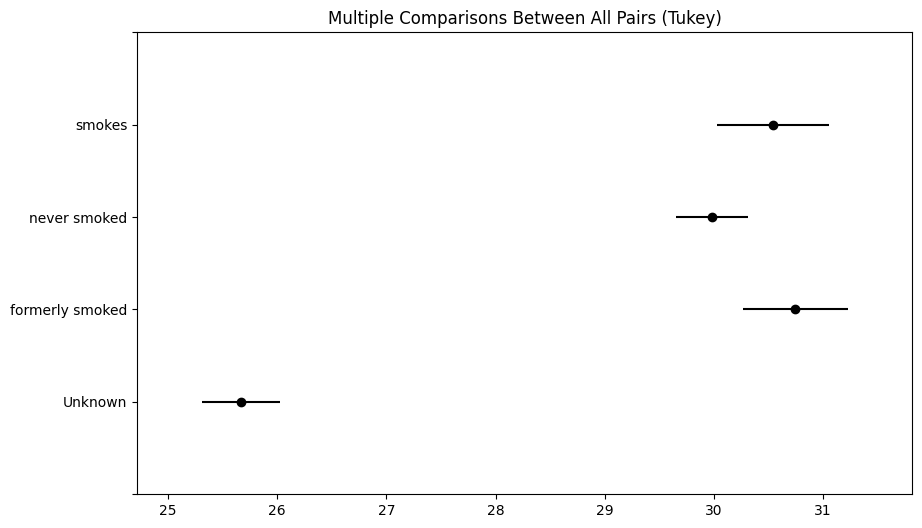

In [ ]:
# @title Tukey para las variables 'bmi' y 'smoking_status'

tukey = pairwise_tukeyhsd(endog=df_sin_nulos['bmi'],     # Data
                          groups=df_sin_nulos['smoking_status'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()

Aunque previamente en test anteriores saliese que las varianzas no son homogéneas podemos ver que aqui se muesrtra que las varianzas de los grupos son bastante similares y que el subgrupo que realmente se distingue del resto el el subrupo 'unknown'.

group1,group2,meandiff,p-adj,lower,upper,reject
Govt_job,Never_worked,-4.9766,0.0095,-9.128,-0.8252,True
Govt_job,Private,-0.2174,0.9558,-1.0611,0.6263,False
Govt_job,Self-employed,-0.3102,0.9232,-1.337,0.7166,False
Govt_job,children,-10.4841,0.0,-11.5459,-9.4222,True
Never_worked,Private,4.7592,0.0133,0.6625,8.8559,True
Never_worked,Self-employed,4.6664,0.0179,0.5282,8.8047,True
Never_worked,children,-5.5075,0.0027,-9.6546,-1.3603,True
Private,Self-employed,-0.0928,0.9976,-0.8693,0.6838,False
Private,children,-10.2666,0.0,-11.089,-9.4442,True
Self-employed,children,-10.1739,0.0,-11.1832,-9.1646,True


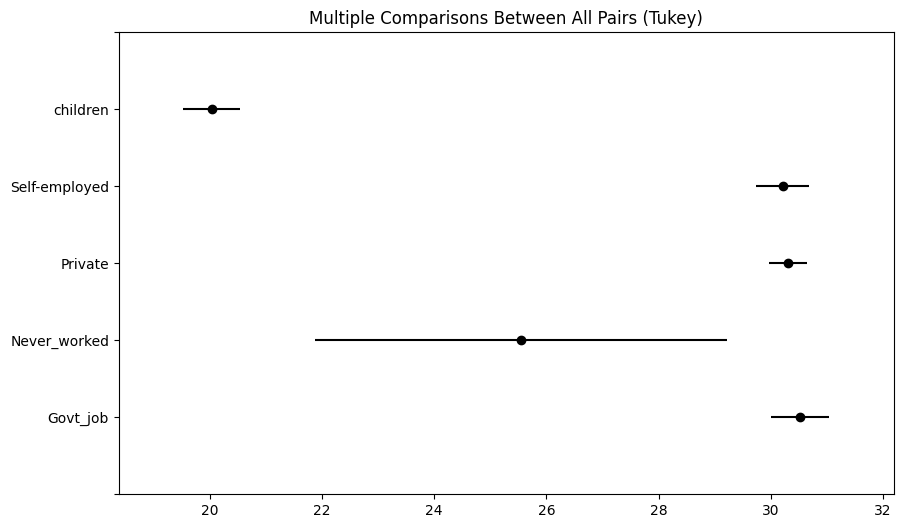

In [ ]:
# @title Tukey para las variables 'bmi' y 'work_type

tukey = pairwise_tukeyhsd(endog=df_sin_nulos['bmi'],     # Data
                          groups=df_sin_nulos['work_type'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()

Aquí sí que podemos ver claramenete que la varianza del subgrupo never_worked es muy distinta a las otras, que si que parecen homogéneas entre si. Además, podemos ver que 'children' y 'never_worked' son los subgrupos que claramente difieren de los otros subgrupos.

# 8.CONCLUSIONES

En cuanto a los objetivos que se establecieron al inicio del informe:  

* Podemos decir que se ha cumplido el **objetivo principal** ya que hemos aplicado y aprendido diferentes herramientas estadísticas como el análisis de la media y la mediana, histogramas, pruebas de t-student, de chi-cuadrado, de levene, de anova, etc.

* Hemos podido completar de manera parcial el **objetivo general** de investigar en qué medida diversas condiciones pueden influir en la probabilidad de que las personas sufran accidentes cerebrovasculares, en este caso la condición de fumador. Sin embargo, nuestra muestra no se distribuye de forma normal y no existe homocedasticidad de varianzas entre grupos, y por tanto, no se cumplen las condiciones para que varias de nuestras conclusiones  se pueden considerar válidas.

* Dentro de los **objetivos específicos**:

  - El dataset que hemos escogido tiene pocas variables continuas y categóricas, por lo que para el análisis nos hemos centrado en bmi y condición de fumador.
  
  - Podemos concluir que la edad media de personas con stroke es a los 67 años, no teniendo diferencia entre hombres y mujeres.

  - Se han encontrado diferencias observables en la edad media, el nivel de glucosa en sangre y el índice de masa corporal entre las personas que han sufrido un ACV y las que no, siendo mayores los promedios de los que lo han sufrido.

  - La media de edad de aquellos que fuman y los que nunca han fumado es la misma y se situa entre los 46.5 y los 47 años.
  
  - Podemos indicar que el hábito de fumar afecta a la condición de salud de la persona y está relacionado con la probabilidad de desarrollar un accidente cerebrovascular.